# Generación de los datos de enfermos covid19 
El siguiente notebook sirve para dar un ejemplo de un sistema de saturación de infrestructura a partir de los datos de población afectada por el virus *Covid-19* .


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import covid_mun_cal


Los datos que tenemos sobre los enfermos no son publicos, por lo tanto de dichos datos  se extraen las distribuciones y se cargan. 

Los datos cargados son: la distribución de los enfermos y el porcentage de los hospitalizados por rangos de edad

In [19]:
porcen_rangos_hosp= pd.read_csv('edad_enf_grav_dis.csv', index_col='RANGO')
porcen_rangos_hosp

,0
RANGO,
pobm_00_04,NaN
pobm_05_09,0.000000
pobm_10_14,0.333333
pobm_15_19,0.000000
pobm_20_24,0.000000
pobm_25_29,0.035714
pobm_30_34,0.090909
pobm_35_39,0.160000
pobm_40_44,0.125000


In [6]:
#por_cent_edad_dis_enf=ran_en_edad/ran_en_edad.sum()
#por_cent_edad_dis_enf.reset_index().to_csv('edad_enf_por_dis.csv', index=False)
por_cent_edad_dis_enf= pd.read_csv('edad_enf_por_dis.csv', index_col='RANGO')
por_cent_edad_dis_enf

,0
RANGO,
pobm_00_04,0.000000
pobm_05_09,0.005181
pobm_10_14,0.015544
pobm_15_19,0.005181
pobm_20_24,0.046632
pobm_25_29,0.145078
pobm_30_34,0.170984
pobm_35_39,0.129534
pobm_40_44,0.082902


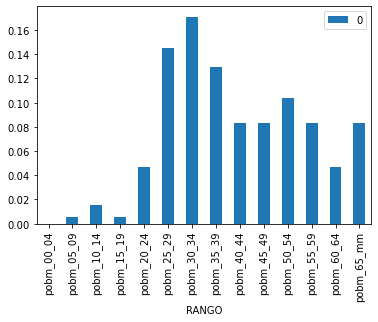

In [7]:
por_cent_edad_dis_enf.plot.bar()

Como se observa la distrubución es similar a la presentada en la conferencia de prensa del 31 de marzo de 2020, por lo que vamos a utilizar estos datos para hacer las aproximaciones de hospitalizaciones de la enfermedad. Usemos el dataframe de los enfermos totales por covid19.

A partir de los dato de la población pyoyectada por la *CONAPO* vamos a tomar la distribución por municipio https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2016-2050

Quedemos con la población para el año $2020$

In [8]:
df_poblacion_20= covid_mun_cal.get_pob_dataframe('2020')

Se desea es la distribución media por municipio que se obtiene de la tabla de proyecciones de los municipios 

In [9]:
df_poblacion_20.head()

,CLAVE,CLAVE_ENT,NOM_ENT,MUN,SEXO,AÑO,EDAD_QUIN,POB
5,01001,01,Aguascalientes,Aguascalientes,Mujeres,2020,pobm_00_04,37967
21,01002,01,Aguascalientes,Asientos,Mujeres,2020,pobm_00_04,2501
37,01003,01,Aguascalientes,Calvillo,Mujeres,2020,pobm_00_04,2715
53,01004,01,Aguascalientes,Cosío,Mujeres,2020,pobm_00_04,794
69,01005,01,Aguascalientes,Jesús María,Mujeres,2020,pobm_00_04,6344


In [10]:
res= covid_mun_cal.distro_all_mun(df_poblacion_20)

In [11]:
res

EDAD_QUIN,pobm_00_04,pobm_05_09,pobm_10_14,pobm_15_19,pobm_20_24,pobm_25_29,pobm_30_34,pobm_35_39,pobm_40_44,pobm_45_49,pobm_50_54,pobm_55_59,pobm_60_64,pobm_65_mm
CLAVE,,,,,,,,,,,,,,
01001,0.080440,0.084952,0.088373,0.091117,0.090854,0.087576,0.078293,0.069975,0.065588,0.062453,0.054667,0.045630,0.035449,0.064636
01002,0.098891,0.102725,0.103629,0.100641,0.093032,0.085070,0.073529,0.061930,0.054734,0.050035,0.041699,0.034071,0.028036,0.071976
01003,0.090619,0.093400,0.096313,0.094635,0.085402,0.077057,0.068960,0.060221,0.054263,0.052485,0.049029,0.044273,0.038825,0.094519
01004,0.094988,0.102494,0.104209,0.100366,0.089904,0.080388,0.071640,0.063483,0.057040,0.052311,0.044213,0.036884,0.030145,0.071935
01005,0.101226,0.105159,0.102716,0.096402,0.089888,0.088168,0.084811,0.076054,0.063679,0.051343,0.039329,0.031141,0.024657,0.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32054,0.102989,0.104723,0.104327,0.097586,0.084651,0.076424,0.071765,0.066115,0.057987,0.050751,0.043961,0.037815,0.030431,0.070476
32055,0.086090,0.088102,0.087882,0.082851,0.073827,0.069174,0.065306,0.060684,0.057194,0.056188,0.054270,0.051031,0.045277,0.122123
32056,0.081070,0.082806,0.080800,0.085011,0.090521,0.089287,0.079469,0.070377,0.065362,0.064109,0.059640,0.051577,0.038545,0.061427


In [12]:
dis_prom= res.mean()

In [13]:
##### Es la distribución promedio 
dis_prom

EDAD_QUIN
pobm_00_04    0.088885
pobm_05_09    0.091933
pobm_10_14    0.093468
pobm_15_19    0.089093
pobm_20_24    0.080108
pobm_25_29    0.074802
pobm_30_34    0.069285
pobm_35_39    0.062947
pobm_40_44    0.058457
pobm_45_49    0.055757
pobm_50_54    0.050269
pobm_55_59    0.044724
pobm_60_64    0.038906
pobm_65_mm    0.101366
dtype: float64

# Factores para la multiplicación con la distribución de los enfermos. 

Con esta distribución promedio obtenida de los municipio podemos calcular la distribución de enfermos por edad en cada municipio tomamdo un cierto factor y así calcular las camas que se utilizarán. Simplemente hay que multiplicar los elementos de la distribución por el total de la cantidad de enfermos. 

Tomemos el ejemplo, para los casos de *Tlalpan, Coyoacan y Alvaro Obregon* se toman como una sóla unidad para calcular el número de camas necesarias.

Se calculan los enfermos utilizando el modelos SIR (Se puede modificar para obtener mejores resultados) y las distribuciones correspondientes a cada municipio junto con los factores a multiplicar.  


Se toman las poblaciones en cada uno de estos municipios 

In [14]:
tot_Coyo=df_poblacion_20[ df_poblacion_20['CLAVE'] =='09003']['POB'].sum()
tot_AlvO=df_poblacion_20[ df_poblacion_20['CLAVE'] =='09010']['POB'].sum()
tot_Tlal=df_poblacion_20[ df_poblacion_20['CLAVE'] =='09012']['POB'].sum()

In [15]:

dis_enf_Coyo_2= covid_mun_cal.distri_enf_mun_df('09003', res,por_cent_edad_dis_enf, dis_prom)
Cam_Coy= covid_mun_cal.Camas_mun_df(tot_Coyo, dis_enf_Coyo_2, porcen_rangos_hosp,  time=200)

In [16]:
#Alvaro obregon
dis_enf_AlvO= covid_mun_cal.distri_enf_mun_df('09010', res, por_cent_edad_dis_enf, dis_prom)
Cam_AlvO=  covid_mun_cal.Camas_mun_df(tot_AlvO, dis_enf_AlvO,porcen_rangos_hosp, time=200)
#Tlalpan
dis_enf_Tlal=  covid_mun_cal.distri_enf_mun_df('09012',res,por_cent_edad_dis_enf, dis_prom)
Cam_Tlal=  covid_mun_cal.Camas_mun_df(tot_Tlal, dis_enf_Tlal,porcen_rangos_hosp, time=200)


In [17]:
Sum_total =  [sum(x) for x in zip(Cam_Coy['Tot'], Cam_AlvO['Tot'],Cam_Tlal['Tot'])]

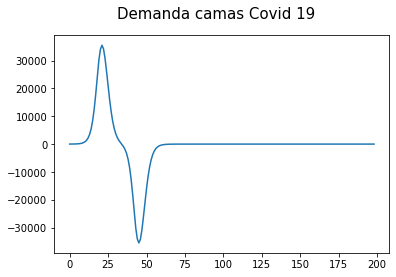

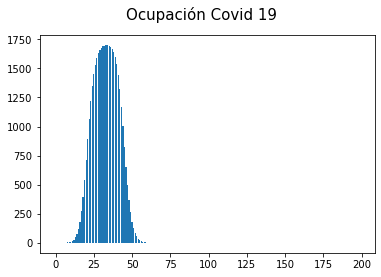

In [18]:
%matplotlib inline
camas_dem= covid_mun_cal.demanda_camas_ind(Sum_total, camas_hospital= 200, plot_s=True, rec_time=24)

En la primera gráfica se observa la demanda de camas, mientras en la segunda la ocupación de las mismas. La función nos regresa la demanda en los distintos tiempos y la saturación normalizada con respecto al número de camas. 